In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pathlib

In [5]:
cwd= pathlib.Path.cwd()

In [6]:
# from google.colab import drive
# drive.mount('/content/gdrive')
# cwd = pathlib.Path("/content/gdrive/MyDrive/telco_customer_churn_prediction/")
# cwd

In [7]:
df= pd.read_csv(cwd / "Telco-Customer-Churn.csv")

In [8]:
df.shape

(7032, 21)

In [9]:
df.head().transpose()

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [10]:
#Unique values in object types (excluding customerID)
for col in df.drop(columns="customerID").select_dtypes(include="object").columns: print(f"{col}: {len(df[col].unique())}")

gender: 2
Partner: 2
Dependents: 2
PhoneService: 2
MultipleLines: 3
InternetService: 3
OnlineSecurity: 3
OnlineBackup: 3
DeviceProtection: 3
TechSupport: 3
StreamingTV: 3
StreamingMovies: 3
Contract: 3
PaperlessBilling: 2
PaymentMethod: 4
Churn: 2


In [11]:
df= df.drop(columns="customerID")

In [12]:
X= df.drop(columns="Churn")
y= df["Churn"]

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [14]:
X_obj= X.select_dtypes(include="object")
X_num = X.select_dtypes(exclude="object")

In [15]:
X_obj_dummies= pd.get_dummies(data=X_obj,drop_first=True)

In [16]:
X_obj_dummies.shape

(7032, 26)

In [17]:
X_obj_dummies.head().transpose()

,0,1,2,3,4
gender_Male,0,1,1,1,0
Partner_Yes,1,0,0,0,0
Dependents_Yes,0,0,0,0,0
PhoneService_Yes,0,1,1,0,1
MultipleLines_No phone service,1,0,0,1,0
MultipleLines_Yes,0,0,0,0,0
InternetService_Fiber optic,0,0,0,0,1
InternetService_No,0,0,0,0,0
OnlineSecurity_No internet service,0,0,0,0,0
OnlineSecurity_Yes,0,1,1,1,0


In [18]:
X_d = pd.concat([X_num,X_obj_dummies],axis=1)
X_d.shape

(7032, 30)

In [19]:
y=y.map({"No":0,"Yes":1})

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_d, y, test_size=0.2, random_state=555)

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [30]:
pipe= Pipeline(steps=[('est',LogisticRegression())])

In [23]:
scaler = StandardScaler()

In [24]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [44]:
params_grid = [{
                'est':[LogisticRegression(penalty="elasticnet", solver="saga")],
                'est__C':[0.001,0.01,0.1,0.5,1,2,4,5],
                'est__l1_ratio':[0.1, 0.25, 0.5, 0.75, 1],
                },
               {
                'est':[KNeighborsClassifier()],
                'est__n_neighbors': [1, 3, 5, 7, 9, 11]
                }
              ]


In [45]:
grid = GridSearchCV(estimator=pipe,
                    param_grid=params_grid,
                    scoring='accuracy',
                    cv=3,
                    verbose=10,
                    n_jobs=2)

In [46]:
scaled_X_train[0:5]

array([[ 2.28223778, -0.75442721,  0.47399864, -0.54972689, -0.99911151,
        -0.96660184, -0.65728721,  0.33118926, -0.33118926, -0.8573448 ,
         1.14003199, -0.52544165, -0.52544165,  1.57848665, -0.52544165,
         1.37281295, -0.52544165, -0.72329241, -0.52544165, -0.64124033,
        -0.52544165, -0.78983876, -0.52544165, -0.79787323, -0.51357663,
        -0.56359453, -1.2001446 , -0.53149764,  1.41534569, -0.54276283],
       [-0.43816644,  0.95573809,  0.01868573,  0.54215157, -0.99911151,
         1.03455214,  1.52140493,  0.33118926, -0.33118926,  1.16639187,
        -0.87716837, -0.52544165, -0.52544165,  1.57848665, -0.52544165,
        -0.72843136, -0.52544165, -0.72329241, -0.52544165, -0.64124033,
        -0.52544165,  1.26608119, -0.52544165, -0.79787323,  1.94712911,
        -0.56359453, -1.2001446 , -0.53149764, -0.70654117, -0.54276283],
       [-0.43816644,  1.44435675, -0.29152746,  0.69106922, -0.99911151,
         1.03455214, -0.65728721,  0.33118926, -0

In [47]:
grid.fit(scaled_X_train, y_train)

Fitting 3 folds for each of 46 candidates, totalling 138 fits
[CV] est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=0.001, est__l1_ratio=0.1 
[CV] est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=0.001, est__l1_ratio=0.1 
[CV]  est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=0.001, est__l1_ratio=0.1, score=0.753, total=   0.1s
[CV] est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=0.001, est__l1_ratio=0.1 
[CV]  est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=0.001, est__l1_ratio=0.1, score=0.741, total=   0.2s
[CV] est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=0.001, est__l1_ratio=0.25 


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Batch computation too fast (0.1524s.) Setting batch_size=2.


[CV]  est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=0.001, est__l1_ratio=0.25, score=0.737, total=   0.1s
[CV] est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=0.001, est__l1_ratio=0.25 
[CV]  est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=0.001, est__l1_ratio=0.1, score=0.751, total=   0.2s
[CV] est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=0.001, est__l1_ratio=0.5 
[CV]  est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=0.001, est__l1_ratio=0.25, score=0.737, total=   0.1s
[CV] est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=0.001, est__l1_ratio=0.25 
[CV]  est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=0.001, est__l1_ratio=0.5, score=0.737, total=   0.1s
[CV] est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=0.001, est__l1_ratio=0.5 


[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.3s


[CV]  est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=0.001, est__l1_ratio=0.25, score=0.737, total=   0.1s
[CV] est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=0.001, est__l1_ratio=0.5 
[CV]  est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=0.001, est__l1_ratio=0.5, score=0.737, total=   0.1s
[CV] est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=0.001, est__l1_ratio=0.75 
[CV]  est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=0.001, est__l1_ratio=0.75, score=0.737, total=   0.0s
[CV] est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=0.001, est__l1_ratio=0.75 
[CV]  est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=0.001, est__l1_ratio=0.5, score=0.737, total=   0.1s
[CV] est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=0.001, est__l1_ratio=0.75 
[CV]  est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=0.001, est__l1_ra

[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:    0.8s


[CV]  est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=0.01, est__l1_ratio=0.25, score=0.804, total=   0.1s
[CV] est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=0.01, est__l1_ratio=0.25 
[CV]  est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=0.01, est__l1_ratio=0.1, score=0.786, total=   0.1s
[CV] est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=0.01, est__l1_ratio=0.25 
[CV]  est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=0.01, est__l1_ratio=0.25, score=0.811, total=   0.2s
[CV] est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=0.01, est__l1_ratio=0.5 
[CV]  est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=0.01, est__l1_ratio=0.25, score=0.788, total=   0.2s
[CV] est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=0.01, est__l1_ratio=0.5 
[CV]  est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=0.01, est__l1_ratio=0.5, 

[Parallel(n_jobs=2)]: Done  24 tasks      | elapsed:    1.5s


[CV]  est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=0.01, est__l1_ratio=0.75, score=0.782, total=   0.2s
[CV] est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=0.01, est__l1_ratio=1 
[CV]  est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=0.01, est__l1_ratio=1, score=0.793, total=   0.1s
[CV] est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=0.1, est__l1_ratio=0.1 
[CV]  est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=0.01, est__l1_ratio=1, score=0.802, total=   0.2s
[CV] est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=0.01, est__l1_ratio=1 
[CV]  est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=0.01, est__l1_ratio=1, score=0.778, total=   0.1s
[CV] est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=0.1, est__l1_ratio=0.1 
[CV]  est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=0.1, est__l1_ratio=0.1, score=0.803, tota

[Parallel(n_jobs=2)]: Done  38 tasks      | elapsed:    2.6s


[CV]  est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=0.1, est__l1_ratio=0.75, score=0.787, total=   0.2s
[CV] est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=0.1, est__l1_ratio=1 
[CV]  est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=0.1, est__l1_ratio=0.75, score=0.805, total=   0.2s
[CV] est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=0.1, est__l1_ratio=1 
[CV]  est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=0.1, est__l1_ratio=1, score=0.788, total=   0.2s
[CV] est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=0.5, est__l1_ratio=0.1 
[CV]  est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=0.1, est__l1_ratio=1, score=0.802, total=   0.2s
[CV] est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=0.1, est__l1_ratio=1 
[CV]  est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=0.1, est__l1_ratio=1, score=0.814, total=   0.

[Parallel(n_jobs=2)]: Done  52 tasks      | elapsed:    4.3s


[CV]  est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=0.5, est__l1_ratio=0.75, score=0.785, total=   0.1s
[CV] est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=0.5, est__l1_ratio=1 
[CV]  est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=0.5, est__l1_ratio=0.75, score=0.814, total=   0.2s
[CV] est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=0.5, est__l1_ratio=1 
[CV]  est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=0.5, est__l1_ratio=1, score=0.804, total=   0.1s
[CV] est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=1, est__l1_ratio=0.1 
[CV]  est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=0.5, est__l1_ratio=1, score=0.815, total=   0.1s
[CV] est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=0.5, est__l1_ratio=1 
[CV]  est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=0.5, est__l1_ratio=1, score=0.785, total=   0.2s

/home/fran/anaconda3/envs/py-course-data/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=1, est__l1_ratio=0.1, score=0.803, total=   0.6s
[CV] est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=1, est__l1_ratio=0.1 


/home/fran/anaconda3/envs/py-course-data/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=1, est__l1_ratio=0.25, score=0.802, total=   0.5s
[CV] est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=1, est__l1_ratio=0.25 


/home/fran/anaconda3/envs/py-course-data/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=1, est__l1_ratio=0.1, score=0.815, total=   0.6s
[CV] est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=1, est__l1_ratio=0.5 


/home/fran/anaconda3/envs/py-course-data/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=1, est__l1_ratio=0.25, score=0.815, total=   0.6s
[CV] est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=1, est__l1_ratio=0.25 
[CV]  est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=1, est__l1_ratio=0.25, score=0.784, total=   0.1s
[CV] est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=1, est__l1_ratio=0.5 
[CV]  est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=1, est__l1_ratio=0.5, score=0.783, total=   0.1s
[CV] est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=1, est__l1_ratio=0.75 
[CV]  est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=1, est__l1_ratio=0.5, score=0.804, total=   0.6s
[CV] est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=1, est__l1_ratio=0.5 
[CV]  est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=1, est__l1_ratio=0.75, score=0.804, total=   0.2s


/home/fran/anaconda3/envs/py-course-data/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/fran/anaconda3/envs/py-course-data/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=2)]: Done  70 tasks      | elapsed:    7.0s
/home/fran/anaconda3/envs/py-course-data/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=1, est__l1_ratio=0.5, score=0.815, total=   0.6s
[CV] est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=1, est__l1_ratio=1 
[CV]  est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=1, est__l1_ratio=0.75, score=0.815, total=   0.5s
[CV] est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=1, est__l1_ratio=0.75 
[CV]  est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=1, est__l1_ratio=1, score=0.804, total=   0.1s
[CV] est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=1, est__l1_ratio=1 
[CV]  est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=1, est__l1_ratio=0.75, score=0.783, total=   0.2s
[CV] est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=1, est__l1_ratio=1 
[CV]  est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=1, est__l1_ratio=1, score=0.815, total=   0.1s
[CV] est=Log

/home/fran/anaconda3/envs/py-course-data/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=2, est__l1_ratio=0.1, score=0.815, total=   0.6s
[CV] est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=2, est__l1_ratio=0.1 


/home/fran/anaconda3/envs/py-course-data/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=2, est__l1_ratio=0.1, score=0.804, total=   0.6s
[CV] est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=2, est__l1_ratio=0.25 


/home/fran/anaconda3/envs/py-course-data/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=2, est__l1_ratio=0.1, score=0.784, total=   0.6s
[CV] est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=2, est__l1_ratio=0.25 


/home/fran/anaconda3/envs/py-course-data/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=2, est__l1_ratio=0.25, score=0.803, total=   0.6s
[CV] est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=2, est__l1_ratio=0.25 
[CV]  est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=2, est__l1_ratio=0.25, score=0.783, total=   0.6s
[CV] est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=2, est__l1_ratio=0.5 


/home/fran/anaconda3/envs/py-course-data/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=2, est__l1_ratio=0.25, score=0.815, total=   0.7s
[CV] est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=2, est__l1_ratio=0.5 


/home/fran/anaconda3/envs/py-course-data/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=2, est__l1_ratio=0.5, score=0.804, total=   0.6s
[CV] est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=2, est__l1_ratio=0.75 


/home/fran/anaconda3/envs/py-course-data/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=2, est__l1_ratio=0.5, score=0.815, total=   0.6s
[CV] est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=2, est__l1_ratio=0.5 
[CV]  est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=2, est__l1_ratio=0.5, score=0.783, total=   0.1s
[CV] est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=2, est__l1_ratio=0.75 
[CV]  est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=2, est__l1_ratio=0.75, score=0.783, total=   0.1s
[CV] est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=2, est__l1_ratio=1 
[CV]  est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=2, est__l1_ratio=0.75, score=0.804, total=   0.6s
[CV] est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=2, est__l1_ratio=0.75 


/home/fran/anaconda3/envs/py-course-data/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/fran/anaconda3/envs/py-course-data/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/fran/anaconda3/envs/py-course-data/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=2)]: Done  88 tasks      | elapsed:   10.9s


[CV]  est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=2, est__l1_ratio=1, score=0.804, total=   0.5s
[CV] est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=2, est__l1_ratio=1 
[CV]  est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=2, est__l1_ratio=0.75, score=0.815, total=   0.6s
[CV] est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=4, est__l1_ratio=0.1 
[CV]  est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=2, est__l1_ratio=1, score=0.814, total=   0.5s
[CV] est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=2, est__l1_ratio=1 
[CV]  est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=2, est__l1_ratio=1, score=0.783, total=   0.1s
[CV] est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=4, est__l1_ratio=0.1 
[CV]  est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=4, est__l1_ratio=0.1, score=0.802, total=   0.5s
[CV] est=Logis

/home/fran/anaconda3/envs/py-course-data/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/fran/anaconda3/envs/py-course-data/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/fran/anaconda3/envs/py-course-data/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=4, est__l1_ratio=0.1, score=0.783, total=   0.6s
[CV] est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=4, est__l1_ratio=0.25 
[CV]  est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=4, est__l1_ratio=0.1, score=0.814, total=   0.6s
[CV] est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=4, est__l1_ratio=0.25 


/home/fran/anaconda3/envs/py-course-data/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/fran/anaconda3/envs/py-course-data/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=4, est__l1_ratio=0.25, score=0.814, total=   0.5s
[CV] est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=4, est__l1_ratio=0.25 
[CV]  est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=4, est__l1_ratio=0.25, score=0.802, total=   0.5s
[CV] est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=4, est__l1_ratio=0.5 


/home/fran/anaconda3/envs/py-course-data/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/fran/anaconda3/envs/py-course-data/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=4, est__l1_ratio=0.25, score=0.783, total=   0.5s
[CV] est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=4, est__l1_ratio=0.5 
[CV]  est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=4, est__l1_ratio=0.5, score=0.802, total=   0.5s
[CV] est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=4, est__l1_ratio=0.5 


/home/fran/anaconda3/envs/py-course-data/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/fran/anaconda3/envs/py-course-data/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=4, est__l1_ratio=0.5, score=0.814, total=   0.6s
[CV] est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=4, est__l1_ratio=0.75 
[CV]  est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=4, est__l1_ratio=0.5, score=0.783, total=   0.7s
[CV] est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=4, est__l1_ratio=0.75 


/home/fran/anaconda3/envs/py-course-data/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/fran/anaconda3/envs/py-course-data/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=4, est__l1_ratio=0.75, score=0.814, total=   0.5s
[CV] est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=4, est__l1_ratio=0.75 
[CV]  est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=4, est__l1_ratio=0.75, score=0.803, total=   0.5s
[CV] est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=4, est__l1_ratio=1 
[CV]  est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=4, est__l1_ratio=0.75, score=0.783, total=   0.1s
[CV] est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=4, est__l1_ratio=1 
[CV]  est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=4, est__l1_ratio=1, score=0.783, total=   0.1s
[CV] est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=5, est__l1_ratio=0.1 


/home/fran/anaconda3/envs/py-course-data/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/fran/anaconda3/envs/py-course-data/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=4, est__l1_ratio=1, score=0.803, total=   0.6s
[CV] est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=4, est__l1_ratio=1 
[CV]  est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=5, est__l1_ratio=0.1, score=0.802, total=   0.5s
[CV] est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=5, est__l1_ratio=0.1 


/home/fran/anaconda3/envs/py-course-data/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=4, est__l1_ratio=1, score=0.814, total=   0.5s
[CV] est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=5, est__l1_ratio=0.25 


/home/fran/anaconda3/envs/py-course-data/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=5, est__l1_ratio=0.1, score=0.814, total=   0.6s
[CV] est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=5, est__l1_ratio=0.1 


/home/fran/anaconda3/envs/py-course-data/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=5, est__l1_ratio=0.25, score=0.802, total=   0.6s
[CV] est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=5, est__l1_ratio=0.25 


/home/fran/anaconda3/envs/py-course-data/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=5, est__l1_ratio=0.1, score=0.783, total=   0.6s
[CV] est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=5, est__l1_ratio=0.25 


/home/fran/anaconda3/envs/py-course-data/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=2)]: Done 110 tasks      | elapsed:   16.4s


[CV]  est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=5, est__l1_ratio=0.25, score=0.814, total=   0.6s
[CV] est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=5, est__l1_ratio=0.5 


/home/fran/anaconda3/envs/py-course-data/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=5, est__l1_ratio=0.25, score=0.783, total=   0.6s
[CV] est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=5, est__l1_ratio=0.5 


/home/fran/anaconda3/envs/py-course-data/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=5, est__l1_ratio=0.5, score=0.814, total=   0.6s
[CV] est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=5, est__l1_ratio=0.5 


/home/fran/anaconda3/envs/py-course-data/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=2)]: Batch computation too slow (2.0258s.) Setting batch_size=1.


[CV]  est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=5, est__l1_ratio=0.5, score=0.802, total=   0.6s
[CV] est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=5, est__l1_ratio=0.75 


/home/fran/anaconda3/envs/py-course-data/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=5, est__l1_ratio=0.5, score=0.783, total=   0.6s
[CV] est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=5, est__l1_ratio=0.75 


/home/fran/anaconda3/envs/py-course-data/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=5, est__l1_ratio=0.75, score=0.802, total=   0.6s
[CV] est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=5, est__l1_ratio=0.75 


/home/fran/anaconda3/envs/py-course-data/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=5, est__l1_ratio=0.75, score=0.783, total=   0.6s
[CV] est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=5, est__l1_ratio=1 


/home/fran/anaconda3/envs/py-course-data/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=5, est__l1_ratio=0.75, score=0.814, total=   0.6s
[CV] est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=5, est__l1_ratio=1 


/home/fran/anaconda3/envs/py-course-data/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=5, est__l1_ratio=1, score=0.802, total=   0.5s
[CV] est=KNeighborsClassifier(), est__n_neighbors=1 ..................


/home/fran/anaconda3/envs/py-course-data/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=5, est__l1_ratio=1, score=0.814, total=   0.5s
[CV] est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=5, est__l1_ratio=1 
[CV]  est=LogisticRegression(penalty='elasticnet', solver='saga'), est__C=5, est__l1_ratio=1, score=0.783, total=   0.1s
[CV] est=KNeighborsClassifier(), est__n_neighbors=1 ..................
[CV]  est=KNeighborsClassifier(), est__n_neighbors=1, score=0.714, total=   0.4s
[CV] est=KNeighborsClassifier(), est__n_neighbors=1 ..................
[CV]  est=KNeighborsClassifier(), est__n_neighbors=1, score=0.718, total=   0.4s
[CV] est=KNeighborsClassifier(), est__n_neighbors=3 ..................
[CV]  est=KNeighborsClassifier(), est__n_neighbors=1, score=0.702, total=   0.4s
[CV] est=KNeighborsClassifier(), est__n_neighbors=3 ..................
[CV]  est=KNeighborsClassifier(), est__n_neighbors=3, score=0.747, total=   0.4s
[CV] est=KNeighborsClassifier(), est__n_neighbors=3 .....

[Parallel(n_jobs=2)]: Done 126 tasks      | elapsed:   20.4s


[CV]  est=KNeighborsClassifier(), est__n_neighbors=5, score=0.763, total=   0.6s
[CV] est=KNeighborsClassifier(), est__n_neighbors=7 ..................
[CV]  est=KNeighborsClassifier(), est__n_neighbors=5, score=0.750, total=   0.5s
[CV] est=KNeighborsClassifier(), est__n_neighbors=7 ..................
[CV]  est=KNeighborsClassifier(), est__n_neighbors=7, score=0.755, total=   0.7s
[CV] est=KNeighborsClassifier(), est__n_neighbors=7 ..................
[CV]  est=KNeighborsClassifier(), est__n_neighbors=7, score=0.766, total=   0.7s
[CV] est=KNeighborsClassifier(), est__n_neighbors=9 ..................
[CV]  est=KNeighborsClassifier(), est__n_neighbors=7, score=0.754, total=   0.6s
[CV] est=KNeighborsClassifier(), est__n_neighbors=9 ..................
[CV]  est=KNeighborsClassifier(), est__n_neighbors=9, score=0.758, total=   0.6s
[CV] est=KNeighborsClassifier(), est__n_neighbors=9 ..................
[CV]  est=KNeighborsClassifier(), est__n_neighbors=9, score=0.783, total=   0.7s
[CV] es

[Parallel(n_jobs=2)]: Done 138 out of 138 | elapsed:   24.5s finished


GridSearchCV(cv=3, estimator=Pipeline(steps=[('est', LogisticRegression())]),
             n_jobs=2,
             param_grid=[{'est': [LogisticRegression(C=0.1, l1_ratio=0.75,
                                                     penalty='elasticnet',
                                                     solver='saga')],
                          'est__C': [0.001, 0.01, 0.1, 0.5, 1, 2, 4, 5],
                          'est__l1_ratio': [0.1, 0.25, 0.5, 0.75, 1]},
                         {'est': [KNeighborsClassifier()],
                          'est__n_neighbors': [1, 3, 5, 7, 9, 11]}],
             scoring='accuracy', verbose=10)

In [48]:
grid.best_params_

{'est': LogisticRegression(C=0.1, l1_ratio=0.75, penalty='elasticnet', solver='saga'),
 'est__C': 0.1,
 'est__l1_ratio': 0.75}

In [49]:
grid_cv_results = pd.DataFrame(grid.cv_results_)

In [50]:
grid_cv_results.sort_values(by="mean_test_score",ascending=False).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_est,param_est__C,param_est__l1_ratio,param_est__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
13,0.145408,0.038193,0.004630,0.004975,"LogisticRegression(C=0.1, l1_ratio=0.75, penal...",0.1,0.75,NaN,"{'est': LogisticRegression(C=0.1, l1_ratio=0.7...",0.804800,0.814400,0.786667,0.801956,0.011499,1
12,0.155348,0.033647,0.001116,0.000008,"LogisticRegression(C=0.1, l1_ratio=0.75, penal...",0.1,0.5,NaN,"{'est': LogisticRegression(C=0.1, l1_ratio=0.7...",0.804267,0.813333,0.787200,0.801600,0.010834,2
14,0.186223,0.044118,0.001863,0.000920,"LogisticRegression(C=0.1, l1_ratio=0.75, penal...",0.1,1,NaN,"{'est': LogisticRegression(C=0.1, l1_ratio=0.7...",0.802133,0.814400,0.787733,0.801422,0.010898,3
19,0.126753,0.017203,0.001131,0.000007,"LogisticRegression(C=0.1, l1_ratio=0.75, penal...",0.5,1,NaN,"{'est': LogisticRegression(C=0.1, l1_ratio=0.7...",0.803733,0.814933,0.785067,0.801244,0.012319,4
10,0.165828,0.017930,0.001514,0.000292,"LogisticRegression(C=0.1, l1_ratio=0.75, penal...",0.1,0.1,NaN,"{'est': LogisticRegression(C=0.1, l1_ratio=0.7...",0.803200,0.813867,0.786667,0.801244,0.011190,4


In [51]:
from sklearn.metrics import plot_confusion_matrix, classification_report

In [52]:
y_pred=grid.predict(scaled_X_test)

In [53]:
y_pred

array([0, 0, 0, ..., 0, 0, 1])

In [54]:
y_test

1857    0
2676    0
5319    0
414     0
312     0
       ..
6169    0
1815    0
6115    0
6340    0
4397    1
Name: Churn, Length: 1407, dtype: int64

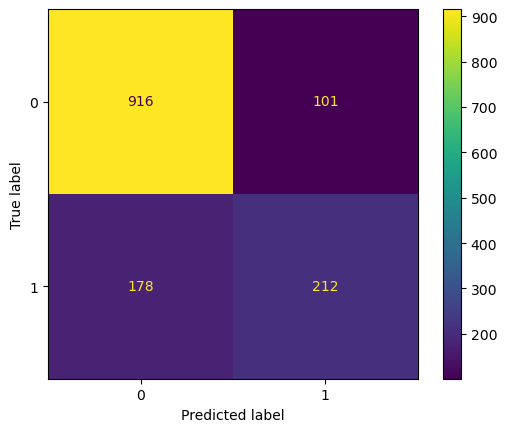

In [55]:
plot_confusion_matrix(grid.best_estimator_,scaled_X_test,y_test.to_numpy().reshape(-1,1))

In [56]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1017
           1       0.68      0.54      0.60       390

    accuracy                           0.80      1407
   macro avg       0.76      0.72      0.74      1407
weighted avg       0.79      0.80      0.79      1407

